# Importing and saving the dataset while exporing data 1

### Imports

In [1]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import os

In [2]:
# Loading the datasets
# Create the directory if it doesn't exist
os.makedirs('../data/raw', exist_ok=True)

# Load the datasets
data = tf.keras.datasets.cifar10.load_data()

# Save the datasets
(x_train, y_train), (x_test, y_test) = data
np.savez_compressed('../data/raw/cifar10_train.npz', x_train=x_train, y_train=y_train)
np.savez_compressed('../data/raw/cifar10_test.npz', x_test=x_test, y_test=y_test)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


In [3]:
# Load CIFAR-10 dataset from the saved files
train_data = np.load('../data/raw/cifar10_train.npz')
test_data = np.load('../data/raw/cifar10_test.npz')

x_train = train_data['x_train']
y_train = train_data['y_train']
x_test = test_data['x_test']
y_test = test_data['y_test']

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_test.shape

(10000, 1)

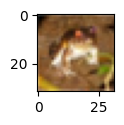

In [8]:
plt.figure(figsize=(10, 1))
plt.imshow(x_train[0])

In [9]:
# Storing the 10 classes present in the dataset to help during testing and evaluating stage
classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

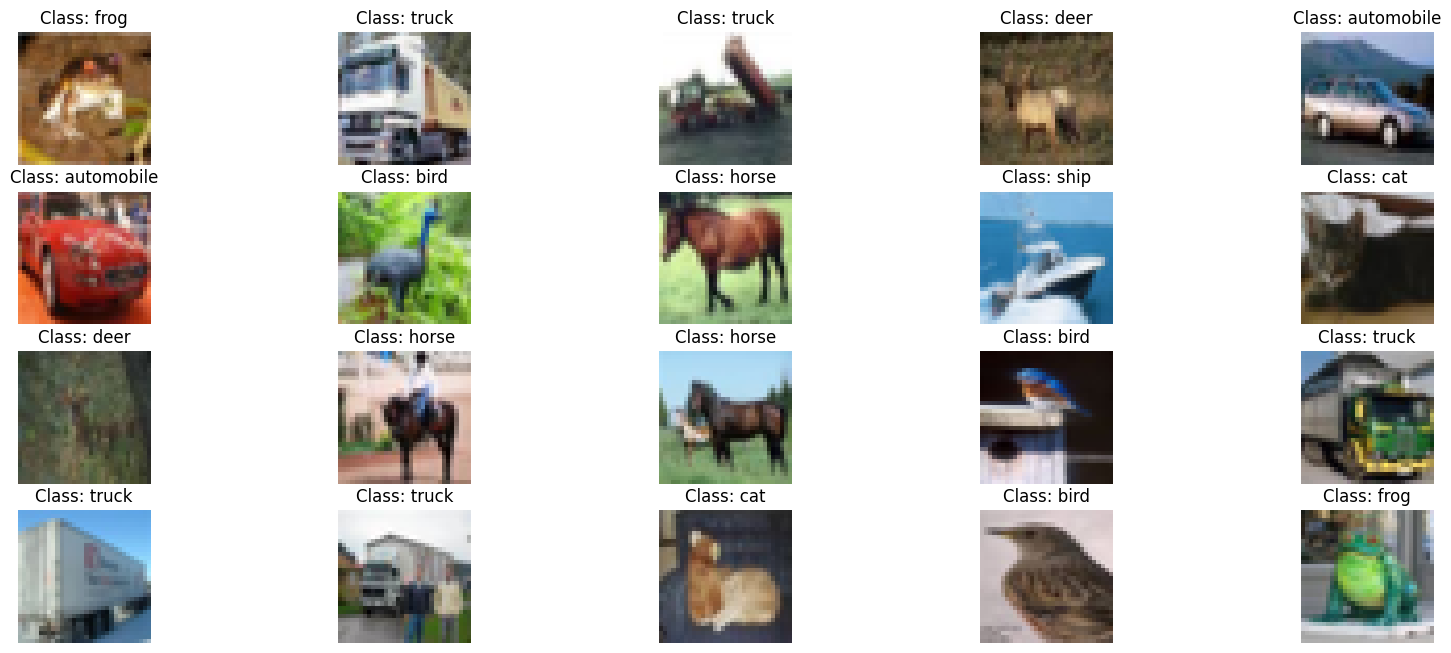

In [10]:
plt.figure(figsize=(20, 10))

for i, (image, label) in enumerate(zip(x_train[:20], y_train[:20])):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(image)  # Display the image
    plt.title(f"Class: {classes[label[0]]}")
    plt.axis('off')

In [11]:
# Many deep learning models (especially those using categorical cross-entropy loss) require the target labels to be in a one-hot encoded format rather than integer class labels.

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [12]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [13]:
# Create the directory if it doesn't exist
os.makedirs('../data/processed', exist_ok=True)

# Save the processed datasets
np.savez_compressed('../data/processed/cifar10_train.npz', x_train=x_train, y_train=y_train)
np.savez_compressed('../data/processed/cifar10_test.npz', x_test=x_test, y_test=y_test)